In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_circles, venn3_unweighted

DB_LABELS = {
    "odb": "Nematoda ODB10",
    "wbps": "WBPS",
}


def venn_sets(orthogroups_path, columns, db_label="odb"):
    df = pd.read_csv(orthogroups_path, delimiter="\t")
    print(df.sample(3).to_markdown())
    df.columns = columns
    db_hogs = df[~df[db_label].isna()]["hog"].to_list()
    helixer_hogs = df[~df["helixer"].isna()]["hog"].to_list()
    braker_hogs = df[~df["braker"].isna()]["hog"].to_list()
    return [set(db_hogs), set(helixer_hogs), set(braker_hogs)]

def make_venn3_plot(data, title, db_label="odb", output=None):
    venn3_unweighted(data, set_labels=[DB_LABELS[db_label], "Helixer", "BRAKER"],
                     set_colors=("red", "blue", "white"))
    venn3_circles(subsets= (1,1,1,1,1,1,1))
    plt.suptitle("Phylogenetic Hierarchical Orthogroups", fontsize=14)
    plt.title(title, fontsize=11)
    if output:
        plt.savefig(output)

|       | HOG           | OG        | Gene Tree Parent Clade   |   ancylostoma_ceylanicum.PRJNA72583.WBPS19.protein | nematoda_odb10                         | proteins             | proteins_hq                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

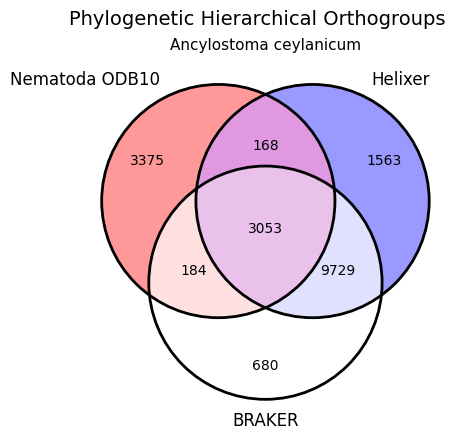

In [31]:
orthogroups_path = "data/from_MARS/OrthoFinder/Results_Jun03_1/Phylogenetic_Hierarchical_Orthogroups/N0.tsv"
columns = ["hog", "og", "clade", "wbps", "odb", "braker", "helixer"]
data = venn_sets(orthogroups_path, columns)
make_venn3_plot(data, "Ancylostoma ceylanicum", output="plots/Ace_hog_venn_odb.png")

|       | HOG           | OG        | Gene Tree Parent Clade   |   braker2_proteins | helixer_proteins_full                                                                                           | nematoda_odb10                         |
|------:|:--------------|:----------|:-------------------------|-------------------:|:----------------------------------------------------------------------------------------------------------------|:---------------------------------------|
| 23669 | N0.HOG0023669 | OG0023471 | -                        |                nan | nan                                                                                                             | 8505at6231_3, 8505at6231               |
| 21213 | N0.HOG0021213 | OG0021015 | -                        |                nan | Teladorsagia_circumcincta_TELCIRDFT_Contig145_000001.1, Teladorsagia_circumcincta_TELCIRDFT_Contig3223_000003.1 | nan                                    |
| 12574 | N0.HOG0012574 | OG0012376 

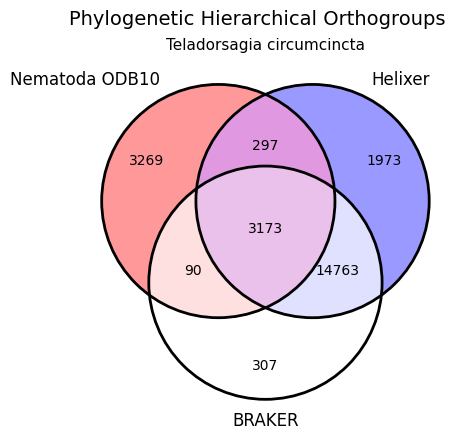

In [33]:
orthogroups_path = "data/from_MARS/OrthoFinder/Results_May03/Phylogenetic_Hierarchical_Orthogroups/N0.tsv"
columns = ["hog", "og", "clade", "braker", "helixer", "odb"]
data = venn_sets(orthogroups_path, columns)
make_venn3_plot(data, "Teladorsagia circumcincta", output="plots/Tc_hog_venn_odb.png")

|       | HOG           | OG        | Gene Tree Parent Clade   | braker2_proteins                | helixer_proteins_hq                                 | ancylostoma_ceylanicum.PRJNA72583.WBPS19.protein         |
|------:|:--------------|:----------|:-------------------------|:--------------------------------|:----------------------------------------------------|:---------------------------------------------------------|
|  5268 | N0.HOG0005268 | OG0003735 | n0                       | g14480.t2, g14480.t1, g16655.t1 | nan                                                 | maker-ANCCEYDFT_Contig706-pred_gff_snap-mRNA-0.11-mRNA-1 |
| 16477 | N0.HOG0016477 | OG0014922 | -                        | nan                             | Ancylostoma_ceylanicum_ANCCEYDFT_Contig397_000011.1 | maker-ANCCEYDFT_Contig397-augustus-gene-1.28-mRNA-1      |
| 12969 | N0.HOG0012969 | OG0011414 | -                        | g16247.t1                       | Ancylostoma_ceylanicum_ANCCEYDFT_Contig90_000003.1  |

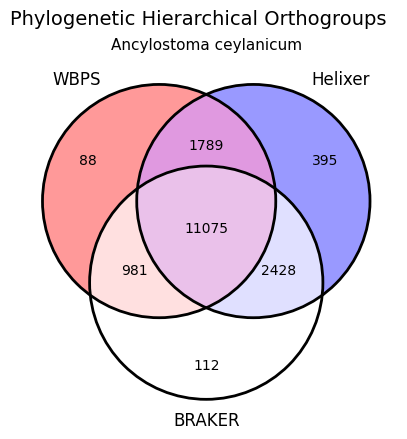

In [40]:
orthogroups_path = "data/from_MARS/OrthoFinder/Results_May02/Phylogenetic_Hierarchical_Orthogroups/N0.tsv"
columns = ["hog", "og", "clade", "braker", "helixer", "wbps"]
data = venn_sets(orthogroups_path, columns, db_label="wbps")
make_venn3_plot(data, "Ancylostoma ceylanicum", db_label="wbps", output="plots/Ace_hog_venn_wbps.png")